<a href="https://colab.research.google.com/github/smrtdylan/Dog-Identification-Network/blob/main/dogs_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this model is to understand the basics of how a ResNet architecture works. Modified code from PyTorch (https://pytorch.org/hub/pytorch_vision_resnet/)

import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 420MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

train = load_dataset("ajinkyakolhe112/dog_breed_classification_kaggle", split="train") # using train split because it actually has the label with what the expected output is supposed to be
train = train.shuffle(seed=42)

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-12-24 00:38:15--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-12-24 00:38:15 (103 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
from torchvision import transforms

def network(filename):


  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(filename)
  input_batch = input_tensor.unsqueeze(0)


  torch.device('cuda')

  with torch.no_grad():
      output = model(input_batch)


  # get possibilities
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  return probabilities


def getOutputs(probabilities):
  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  for i in range(top5_prob.size(0)):
      print(categories[top5_catid[i]] + ": " + str(top5_prob[i].item()*100) + "%")



Image 1:


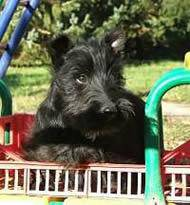


Scotch terrier: 95.45893669128418%
standard schnauzer: 1.3564125634729862%
Scottish deerhound: 1.2424014508724213%
cairn: 0.7670852355659008%
giant schnauzer: 0.2727049868553877%



Image 2:


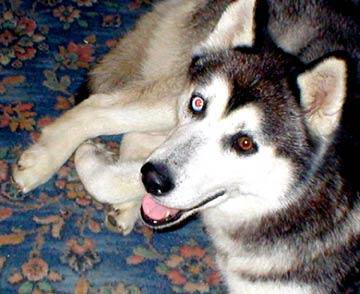


malamute: 37.30948567390442%
Siberian husky: 36.41943037509918%
Eskimo dog: 25.84475874900818%
Norwegian elkhound: 0.16280912095680833%
timber wolf: 0.06183345685712993%



Image 3:


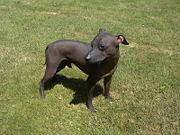


Mexican hairless: 99.17157292366028%
Italian greyhound: 0.4161843564361334%
toy terrier: 0.10394285200163722%
American Staffordshire terrier: 0.09768094168975949%
Staffordshire bullterrier: 0.0813090824522078%



Image 4:


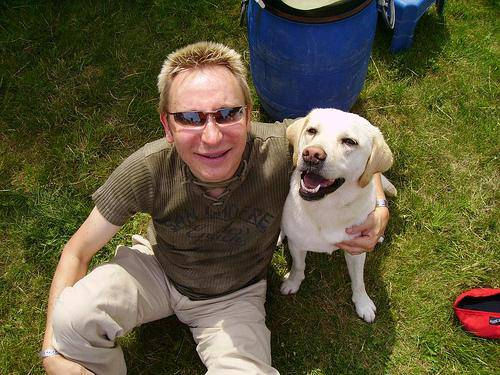


Labrador retriever: 69.45955753326416%
American Staffordshire terrier: 10.47682836651802%
kuvasz: 5.137924477458%
Staffordshire bullterrier: 3.480875864624977%
dalmatian: 2.2969434037804604%



Image 5:


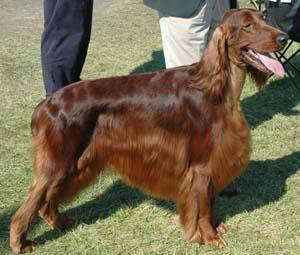


Irish setter: 98.8646149635315%
Sussex spaniel: 0.4054838791489601%
Afghan hound: 0.28309926856309175%
Gordon setter: 0.16611135797575116%
Saluki: 0.08850033627822995%



Image 6:


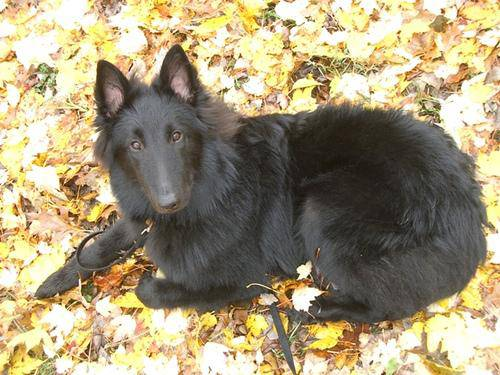


groenendael: 97.33363389968872%
schipperke: 0.5893131718039513%
collie: 0.5478003993630409%
keeshond: 0.25874481070786715%
American black bear: 0.20159275736659765%



Image 7:


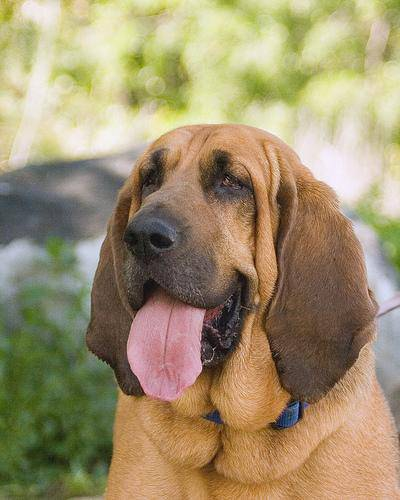


bloodhound: 97.89003133773804%
redbone: 0.7910376414656639%
Rhodesian ridgeback: 0.5824557971209288%
bull mastiff: 0.23891106247901917%
basset: 0.19219410605728626%



Image 8:


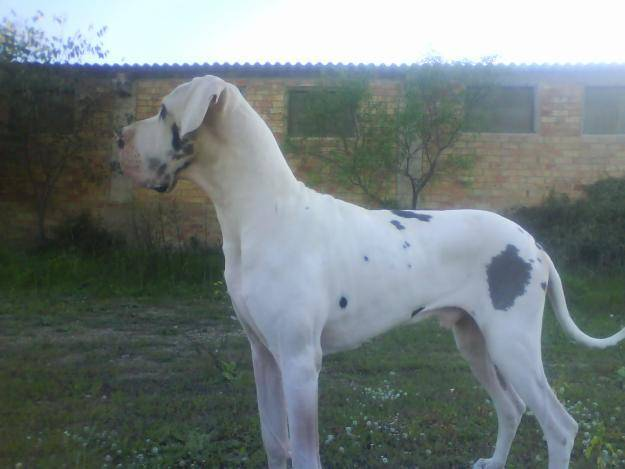


Great Dane: 39.27372395992279%
whippet: 20.952358841896057%
Ibizan hound: 12.408749014139175%
boxer: 5.0841499119997025%
Walker hound: 4.948202520608902%



Image 9:


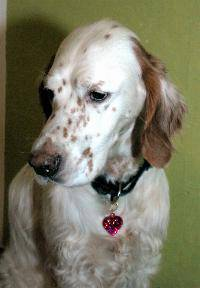


English setter: 98.83964657783508%
Welsh springer spaniel: 0.4549219273030758%
Brittany spaniel: 0.39890329353511333%
clumber: 0.16993451863527298%
German short-haired pointer: 0.026037124916911125%



Image 10:


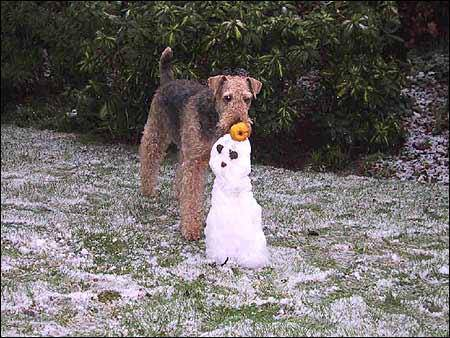


Lakeland terrier: 70.2621579170227%
Airedale: 17.158126831054688%
wire-haired fox terrier: 11.868324130773544%
Kerry blue terrier: 0.1925950637087226%
Irish terrier: 0.14818917261436582%





In [ ]:
import time

section = 20 # images from 21-30 will be pulled.


for x in range(10):
    print("Image " + str(x+1) + ":")
    filename = test[x+section]["image"]
    display(filename)
    print()

    probabilities = network(filename)
    getOutputs(probabilities)

    print("\n\n" )

    time.sleep(2.5)